In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_excel("蔚来真题.xlsx")
df.head(3)

date  value
0 2024-02-17      1
1 2024-02-18      0
2 2024-02-19      1

In [3]:
series=df[df["value"]==0]["value"].index.tolist()
series  # 转化为列表问题

[1, 3, 4, 6, 7, 8, 11, 12, 13, 14, 18, 19, 21, 22]

In [14]:
def outlier_count(series,begin_index=0):
    # 使用切片
    result=[]
    while begin_index <= len(series)-1:  # 相比于series[begin_index]<=series[-1]:的好处：series[begin_index]可能索引报错
        # 对于最后一个元素,只需添加
        if begin_index == len(series)-1:   
            outlier_index=series[begin_index]
            result.append(outlier_index)
            break
        # 否则不仅要添加,还要检查当前与后面n个是否连续
        else:  
            n=1
            end_index= begin_index + 1
            while series[begin_index]+n==series[begin_index+n]:
                end_index = begin_index + 1 + n
                n+=1
                if begin_index+n>len(series)-1: # 如果当前index+n后查过了最大index就退出
                    break
            outlier_index= series[begin_index:end_index]
            result.append(outlier_index)
            begin_index += n
    return result
    
    
result=outlier_count(series)
result

[[1], [3, 4], [6, 7, 8], [11, 12, 13, 14], [18, 19], [21, 22]]

In [75]:
def outlier_count(series,begin_index=0):
    # 使用apeend函数
    result=[]
    output={}
    while begin_index <= len(series)-1:  # 相比于series[begin_index]<=series[-1]:的好处：series[begin_index]可能索引报错
        outlier_index=[]
        outlier_index.append(series[begin_index])
        if begin_index == len(series)-1:   # 对于最后一个元素，无需查后n个
            result.append(outlier_index)
            break
        else:  # 检查当前与后面n个是否连续---条件循环
            n=1
            while series[begin_index]+n==series[begin_index+n]:
                outlier_index.append(series[begin_index+n])
                n+=1
                if begin_index+n>len(series)-1: # 如果当前index+n后查过了最大index就退出
                    break
                    
            result.append(outlier_index)
            begin_index += n
    return Counter([f"连续出现{len(tuple(i))}天" for i in result])
    
            
            
    # for group in result:
    #     key=f"连续{len(group)}天出现"
    #     if key not in output.keys():
    #         value={"频数":1,"对应的索引":[group]}
    #         output[key]=value
    #     else:
    #         output[key]["频数"]+=1
    #         output[key]["对应的索引"].append(group)
    # return result,output  
result=outlier_count(series)
result
# result,output=outlier_count(series)
# result,output  

Counter({'连续出现1天': 1, '连续出现2天': 3, '连续出现3天': 1, '连续出现4天': 1})

In [3]:
class OutlierAnalysis:
    def __init__(self,outlier,df,column):
        self.result=[]
        self.series=df[df[column]==outlier][column]
        self.series_index=self.series.index.tolist()
        self.series_max_index=self.series_index[-1]
        
    def outlier_total_frequency(self):
        return len(self.series)
    
    def outlier_group_frequency(self):
        for id, index in enumerate(self.series_index):
            if not any(index in row for row in self.result):  # 防止冗余
                outlier_index=[]
                outlier_index.append(index)
            n=1
            while index != self.series_max_index:  # 只要目前不是最后一个 都要检查目前后面与n个是否连着
                next_n = self.series_index[id+n]
                if index+n==next_n:
                    outlier_index.append(next_n)
                    n+=1
                    if id+n>len(self.series_index)-1:  # 看第index+n是否已经超出了index范围
                        break
                else:
                    break
            self.result.append(outlier_index)
        self.result=set([tuple(x) for x in self.result])   # 列表不可哈希 要先转换成tuple
        return self.result
    
    def visualization(self,result,path):
        output={}
        for i in result:
            if len(i) not in output.keys():
                output[len(i)]=1
            else:
                output[len(i)]+=1
        x=output.keys()
        y=output.values()
        plt.bar(x,y)
        plt.xlabel("continuous days")
        plt.ylabel("frequent")
        # plt.savefig(path)
        plt.show()
        return output
    
    
    def print_output(self,output):
        new_keys=sorted(list(output.keys()))
        for i in new_keys:
            print(f"连续{i}天的有{output[i]}次")
oa=OutlierAnalysis(0,df,"value")

In [302]:
result=oa.outlier_group_frequency()
result

{(1,), (3, 4), (6, 7, 8, 8), (11, 12, 13, 14, 13, 14, 14), (18, 19), (21, 22)}

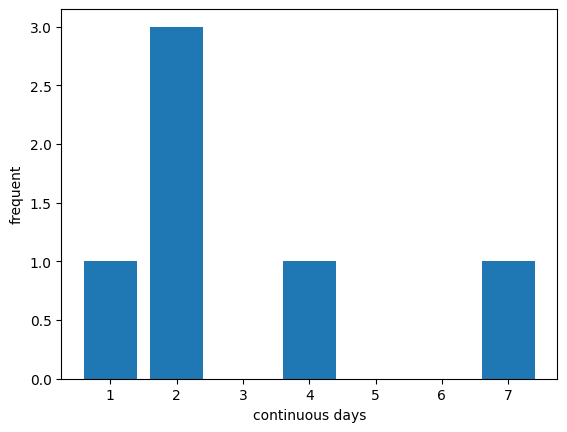

In [304]:
output=oa.visualization(result,None)

In [305]:
oa.print_output(output)

连续1天的有1次
连续2天的有3次
连续4天的有1次
连续7天的有1次


In [ ]:
"""
def search_zeros(series,index_range):
    results=[]
    for i in index_range:
        zero_index=[]
        n=1
        if series[i]==0:   
            zero_index.append(i)
            while i!=index_range[-1]:  # 对于value=0并且当前不是最后一行的情况，要检查后面n行
                if (i+n)<=index_range[-1]:  # 要检查的后面n行并且不能超过index范围
                    if series[i+n]==0:
                        zero_index.append(i+n)
                        n+=1
                else:
                    break
            results.append(zero_index)
    return results
result=search_zeros(df["value"],df["value"].index)
这个方法运行速度太慢了

"""